In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack
#from desi_retriever.denali import get_specs
import matplotlib.cm as cm
import scipy.ndimage as sn

In [2]:
LRG = pd.read_csv('/global/cfs/cdirs/desi/sv/vi/TruthTables/Cascades/LRG/desi-vi_SV_cascades_combination_LRG_all_210521.csv')
LRG['DELTACHI2']=LRG['Redrock_deltachi2']

In [3]:
ELG = pd.read_csv('/global/cfs/cdirs/desi/sv/vi/TruthTables/Cascades/ELG/desi-vi_SV_cascades_combination_ELG_all_210521.csv')
ELG['DELTACHI2']=ELG['Redrock_deltachi2']

In [4]:
BGS = pd.read_csv('/global/cfs/cdirs/desi/sv/vi/TruthTables/Cascades/BGS/desi-vi_SV_cascades_combination_BGS_all_210521.csv')
BGS['DELTACHI2']=BGS['Redrock_deltachi2']

In [5]:
frames = [BGS, LRG, ELG]
ALL= pd.concat(frames)

In [7]:
directory_everest = '/global/cfs/cdirs/desi/spectro/redux/everest/zcatalog/'
everest_all = Table.read(directory_everest+'ztile-sv1-dark-cumulative.fits')

#everest_all = everest_all#[everest_all['coadd_type']=='cumulative']
new_catalog_everest = everest_all['TARGETID','Z','TILEID','DELTACHI2','TARGET_RA','TARGET_DEC',
                              'FIBERFLUX_R','FLUX_R','FIBERFLUX_Z','FLUX_W1','FLUX_G','FLUX_Z','EBV','ZWARN','FIBER'].to_pandas()
#everest_all = Table.read(directory_everest+'ztile-sv1-dark-cumulative.fits')
everest_bright = Table.read(directory_everest+'ztile-sv1-bright-cumulative.fits')


new_catalog_everest_bright = everest_bright['TARGETID','Z','TILEID','DELTACHI2','TARGET_RA','TARGET_DEC'
                              ,'FIBERFLUX_R','FIBERFLUX_G','FLUX_R','FIBERFLUX_Z','FLUX_W1','FLUX_G','FLUX_Z','EBV','ZWARN','FIBER','FIBERTOTFLUX_G','PHOTSYS'].to_pandas()

new_catalog_everest=new_catalog_everest.append(new_catalog_everest_bright)

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [8]:
catalog_all_match = ALL.merge(new_catalog_everest,on='TARGETID',how='left',suffixes=("_cascades","_everest"))
final_match_catalog = catalog_all_match[catalog_all_match['TILEID_cascades']==catalog_all_match['TILEID_everest']]

In [9]:
len(ALL)
#len(final_match_catalog)

4173

In [10]:
final_match_catalog['dz']=abs(final_match_catalog['Z']-final_match_catalog['best_z'])/(1.+final_match_catalog['best_z'])

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
cut_catalog = final_match_catalog[(final_match_catalog['dz']>0.0033) & (final_match_catalog['best_quality']>=2.5)]
cut_catalog.to_csv('Everest_vs_VI_cascades_catalog_inconsistent_z_galaxies.csv')

In [12]:
id = np.arange(0,5000)
number_of_problem = np.arange(0,5000)*0.0

In [13]:
for i in id:
    search = np.where(cut_catalog['FIBER']==i)[0]
    number_of_problem[i]=len(search)

In [14]:
number_of_problem

array([0., 0., 1., ..., 0., 0., 0.])

Text(0.5, 0, 'FIBERID')

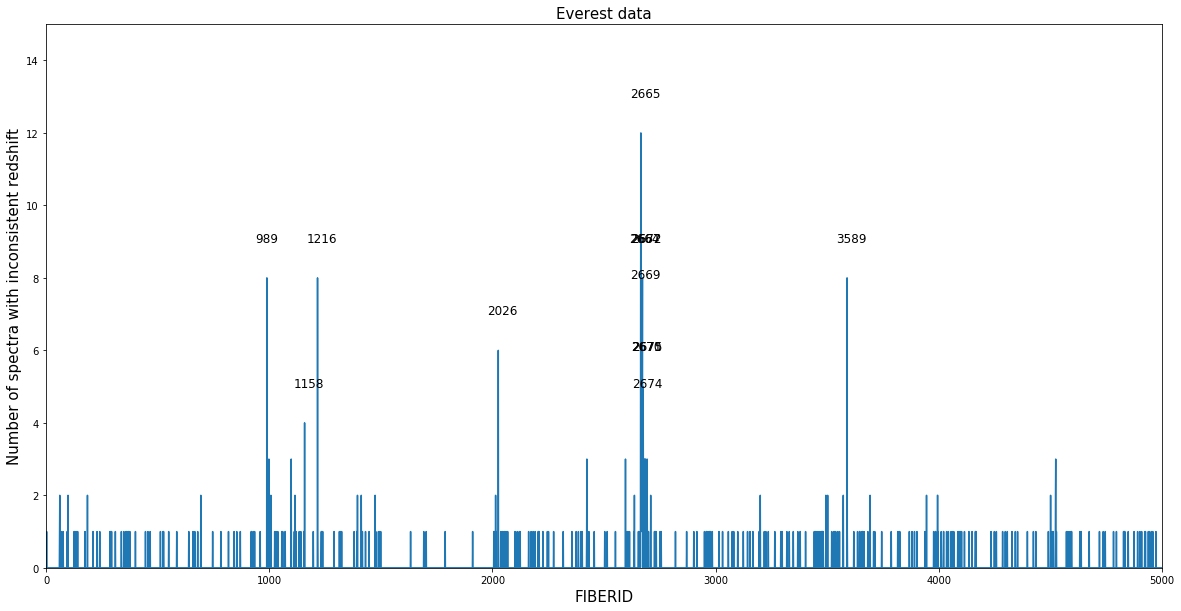

In [15]:
plt.figure(figsize=(20,10))
plt.plot(id,number_of_problem)
plt.ylim(0,15)
plt.xlim(-1,5000)
search = np.where(number_of_problem>=4)
for i in range(0,len(search[0])):
    plt.text(search[0][i]-50,number_of_problem[search[0][i]]+1,'%0.0f' % search[0][i],fontsize=12)
plt.title('Everest data',fontsize=15)
plt.ylabel('Number of spectra with inconsistent redshift',fontsize=15)
plt.xlabel('FIBERID',fontsize=15)
